# Wave Project

## Testing OpenMP and MPI Parallel Programming 
---------------------------------------------------------------------------------------------------

## By: Alexis Morse

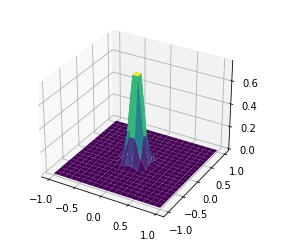

## Abstract:

The wave project uses an exponent equation of x and y values in order to simulate a wave in a 3D grid space. This equation
takes loads of x and y values that are continually being updated in order to show how the height changes when faced with time, x, and y values. The simulation shows the equivalent of a drop of water in a (-1,1), (-1,1), (0.0 ,0.6) grid space. The purpose of this project is to analyze the time is takes for the wave project to run the initial iteration, given different parallel computing techniques via OpenMP and MPI. The time tests are run are based off the first iteration from the equation being run. The formatting of the C++ program are vastly different: MPI program involves changing the C++ code by using distributed memory system commands such as MPI_Send( ) and MPI_Recv( ). In order to test how different commands affect run time, each technique will have 20 run-time trials that will be averaged to get an average run-time value. The time trials should prove commands effectiveness for decreasing run-time. This project shows the difference between process-based parallelism (MPI) and thread-based parallelism (OpenMP). These tests will provide examples of how to utilize OpenMP and MPI on an application that requires data to be stored for later computations. For OpenMP, the techniques that will be tested are the collapse( )/ simd collapse( ) methods, schedule(static/dynamic) method, and reduction( ) method. There are less options for MPI program run-time efficiency. The methods to decrease run-time are algorithm efficiency, non-blocking communication using MPI_Isend() and MPI_Irecv(), and balancing workload methods. The goal of this project is to discover uses and efficiency of OpenMP clauses and MPI functions. Through run-time trials, this analysis of methods will show differences in run-time between shared and distributed memory systems on a parallelized equation. 

 


## Background:


The wave equation defines a sets of 20 points, $x$ & $y$, both ranging from a scale of -1 to 1. We solve for $U_{tt}$ which is the function of time with respect to $ U_{xx} + U_{yy}$. The initial value equation for every $x$, $y$, and $\sigma = 0.1$ value is as follows 

$$ e^ {-\frac{1}{2} * \frac{x^2 + y^2}{ \sigma ^2}} $$

Using the *Taylor Expansion* to approximate the surrounding point values, we can set up the grid of values which forms the wave, as seen in the image above. The points $x_i$ and $y_j$ are each possible position on the $x$ and $y$ axis from a range of -1 to 1. This grid is 3 dimensions so we are calculating the points using the Taylor expansion to find the values of Z, also known as $U_{tt}$. For each value of $x_i$, $y_j$, $t_n$ in the function $$U(x_i, y_j, t^n)$$ 

that make pair values on the grid (i.e. values within the bounds from (1,1), (1,-1), (-1,1),(-1,-1) which are the $x$ and $y$ bounds) there is an $h$ value that represents the distance inbetween all points. The value of $h$ is calculated by the following: $h = \frac{1}{n}$. The value n is represented in the first lines of `int main`within main.cpp as equal to the value of 20. The calcuation written in an iterative style taking account the increase/decrease in the $x$, $y$, and $t$ directioncan be approximated from $U_{tt}$ = $U_{xx} + U_{yy}$ to:


$$\frac{U^{n+1}_{ij} -2U^{n}_{ij} + U^{n-1}_{ij}}{\Delta t^2} = \frac{U^{n}_{(i+1),j} -2U^{n}_{ij} + U^{n}_{(i-1),j}}{h^2} + \frac{U^{n}_{i,(j+1)} -2U^{n}_{ij} + U^{n}_{i,(j-1)}}{h^2}$$

Within the main.cpp program, the double for loops that provide the values for $i$ and $j$ within $(1,M)$ and $(1,N)$ bounds are able to calculate the interior points by setting up arrays to hold the values of $U$, $U^{n}_{ij} = h2i*(-4*u(i,j)+u(i-1,j)+u(i+1,j)+u(i,j-1)+u(i,j+1))$. You have to update the time levels by looping through $i$ and $j$ using a for loop again and update the time Darray. This time array gets set equal to the value of the $U$ Darray that calculated the Taylor expansion equation in the above for loop. The updating of the place and time of the points is what allows for the wave simulation to occur.



This is the combination of the iterative Taylor Expansion equation notation when calculating every value at the location $(U_{xx})^{n}_{i,j}$ , $(U_{yy})^{n}_{i,j}$ , $(U_{tt})^{n}_{i,j}$ The point calculations find the height values within the grid. We need to ensure that once the points fall outside of the grid boundary that the program knows what to set values. This is the next step in `int main` within main.cpp is to establish the boundaries between $i=1$, $i=M$, $j=1$, $j=N$ by setting the values at$U^{n}_{1,j}$, $U^{n}_{i,1}$, $U^{n}_{M,j}$, $U^{n}_{i,N}$ $ = 0$. I am testing to see how OpenMp and MPI are able to speed up the calculation and handling of data memory throughout the multi-memory location processes. For OpenMP, I am testing the program using common scheduling techniques within the for loops because majority of the complex calculations are due to new memory being stored within the . Those calculations take up run time. 

For OpenMP, this application programming interface tries to keep the number of changes to the source code values as small as possible. Computations that build the serial code take up run-time. If the compiler is told what sections of code to parallelize, instead of parallelizing unnecessary portions of code, the multithreaded shared memory parallelism can distribute interations to save time. OpenMP clauses are key to establishing what parts of code need to be parallelized. The MPI application shares and stores information differently than OpenMP. MPI allows for a standardized way to send messages from many computers distributing memory to each other. In the instance of the wave project, the send and receive *message passing* of **u** array, which means the sending of a message to an object, thread, or parallel process, can be manipulated using other MPI functions. 

In both the OpenMP and MPI wave project programs, I added lines of code in the beginning and end of the main functions in order keep track of the time it took for the programs to run. This is how I create my time test averages below. By running the program many times manually, there is a way to observe trends of run time that create the shape of a small wave. When averaging the run time, there should be a base line run time and then run times using optimization methods to compare to. The purpose of this project is to test the optimization techniques on this wavelet scenario to see how running the program 20 times will produce different run time averages. 

------------------------------------------------------

# Results

-------------------------------------------------------------------------------------

#### Running in Serial OpenMP

First we have a ***serial test*** of the wave project without the use of parallel programming techniques. I ran a time test 20 

times then averages the times it took to run the program. The program for averaging is as shown below

The average run time of the serial program is 0.01975754


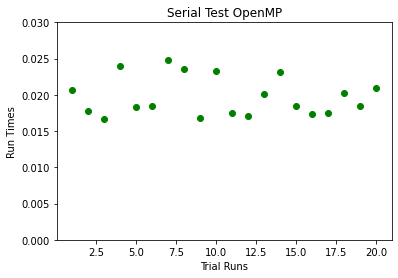

In [1]:
import matplotlib.pyplot as plt
import numpy as np

times = [0.0207202, 0.0178376, 0.0166965, 0.0240438,  0.018265,\
         0.0184283, 0.0247975, 0.0235521, 0.0168302, 0.0232333, \
         0.017483, 0.0170326, 0.020098, 0.0231881, 0.0184656, 0.017382, \
         0.0174514,  0.0202253, 0.0184537, 0.0209666]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "green")
plt.title("Serial Test OpenMP")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the serial program is {}".format(time_mean))

-------------------------------------------------------------------------------------------------

### Open MP

#### First Method: #pragma openmp parallel for collapse( ) on nested for loops

There are two for loops within the code, one is a single nested for loop and i used the following code to combine into one loop iteration for the threads to calculate the code 

`#pragma omp parallel for collapse(2) private(it, j)`

On the second for loop, there were 6 for loops nested within the initial for loop. Therefore, I had to use the following command, similar to the one above but changing values to account for the size of the for loop.

`#pragma omp parallel for collapse(7) private(it, j, i)`

The average run time of the OpenMP Collapse program method is 0.019105854999999998


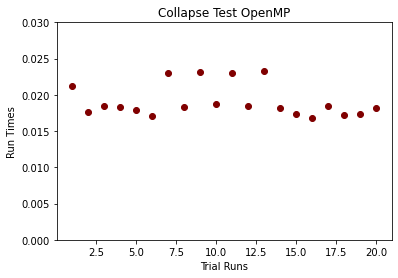

In [2]:
times = [0.021243,  0.0176018, 0.0184186, 0.018308, 0.0178828, 0.0170756,\
         0.0230785, 0.0183478, 0.0231974, 0.0186802, 0.0229645, 0.0184417,\
         0.0233235,  0.0182232, 0.0173285, 0.0168193, 0.0184054, 0.0171735,\
         0.0174065, 0.0181973]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "maroon")
plt.title("Collapse Test OpenMP")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP Collapse program method is {}".format(time_mean))

#### Second Method: #pragma openmp parallel for simd collapse(2) on nested for loops

This method utilizes the `simd` constuct which allows you to make calculations simultaneously by the processor. Combining this command with the `collapse` construct can allow you to decrease the time it takes for the program to loop through double for loops. There are three instances where there is a need to loop through $i$ and $j$ from $M$ to $N$. Sectioning off these sections of code run both of the double for loops so **u** can pull the correct location.

`#pragma omp simd collapse(2)`

The average run time of the OpenMP simd collapse() method is 0.019072844999999995


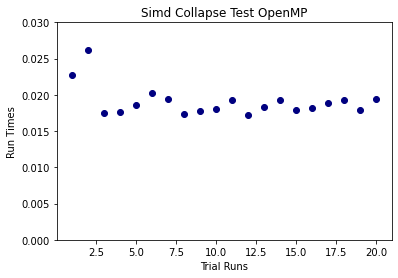

In [3]:
times = [0.0227709,  0.0262295, 0.0175508, 0.0175674, 0.018627, 0.0203225,\
          0.0193685, 0.0173298, 0.0178293, 0.0180933, 0.0192785, 0.0172118,\
         0.0182756,  0.0192867, 0.0178908, 0.0181966, 0.0188866, 0.0193018,\
         0.0179716, 0.0194679]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "navy")
plt.title("Simd Collapse Test OpenMP")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP simd collapse() method is {}".format(time_mean))

#### Third Method: #pragma openmp parallel for schedule(static) on nested for loops

There are two for loops within the code, one is a single nested for loop and i used the following code to improve the code 

`#pragma omp for schedule(static, 3)`

The scheduler gives information on how to process the loop information per threads. I am assigning three iterations to each thread before switching to the next thread. The code above is used on the bigger loop. This allows for separated calls to the threads and hopefully will show an improvement in run time. By splitting up the assigning of variables into the same thread, the calculations can occur in a worksharing loop environment

The average run time of the OpenMP schedule(static) method is 0.018057520000000004


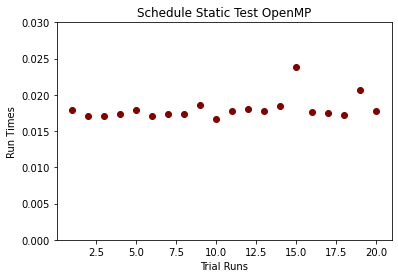

In [4]:
times = [0.0178683,  0.0170896, 0.0170896, 0.0174092, 0.0178828, 0.0170756,\
         0.017307, 0.017371, 0.0185422, 0.0166396, 0.017745, 0.0180805,\
         0.0178145,  0.0184864, 0.0238791, 0.0175909, 0.0175583, 0.0171643,\
         0.0207312, 0.0178253]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "maroon")
plt.title("Schedule Static Test OpenMP")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP schedule(static) method is {}".format(time_mean))

#### Fourth Method: #pragma openmp parallel for ordered schedule(dynamic) on variables within nested for loops

For the type of computation we are calculating, the order of the calculations matter to the solution. Ordered specifies which block of code needs to be computed in an ordered fashion. The schedule dynamic assigns an iteration to each thread and the threads continues to the next iteration once the thread of the first iteration is complete. I used this command on the initialization of function loop as well as the loop calculating the Laplacian inner points.

` #pragma omp parallel for ordered schedule(dynamic) `

The average run time of the OpenMP ordered schedule(dynamic) method is 0.018449695500000002


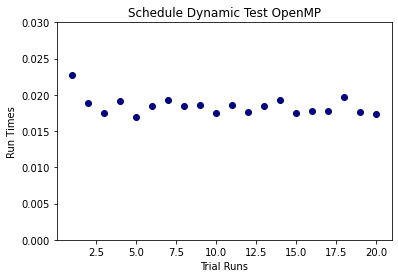

In [5]:
times = [0.0226708,  0.0189336, 0.0174589,  0.019218, 0.0169726, 0.0184449,\
         0.0192267, 0.0184753, 0.0185422, 0.0174508, 0.0186326,
         0.0176799,\
         0.0184909,  0.0192856, 0.0174825, 0.0177032, 0.0177719, 0.01963871,\
         0.0175864, 0.0173284]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "navy")
plt.title("Schedule Dynamic Test OpenMP")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP ordered schedule(dynamic) method is {}".format(time_mean))

#### Fifth Method: #pragma openmp parallel for ordered schedule(dynamic,4) on variables within nested for loops

For the type of computation we are calculating, the order of the calculations matter to the solution. Ordered specifies which block of code needs to be computed in an ordered fashion. The schedule dynamic assigns an iteration to each thread and the threads continues to the next iteration once the thread of the first iteration is complete. I used this command on the initialization of function loop as well as the loop calculating the Laplacian inner points.

` #pragma omp parallel for ordered schedule(dynamic,4)`

The average run time of the OpenMP ordered schedule(dynamic,4) method is 0.01727745


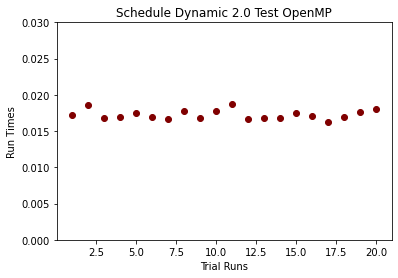

In [6]:
times = [0.0172837, 0.018565, 0.0167857, 0.0168861, 0.0175488, 0.0169505, 0.0167227, 0.0177721,\
         0.0167676, 0.0178227, 0.0187841, 0.0167228, 0.0167479, 0.0167592, 0.0174318, 0.0170939, \
         0.0163007, 0.0169044, 0.0175957, 0.0181036]


trials = np.arange(1,21)

plt.scatter(trials, times, c = "maroon")
plt.title("Schedule Dynamic 2.0 Test OpenMP")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP ordered schedule(dynamic,4) method is {}".format(time_mean))

#### Sixth Method: #pragma openmp parallel for reduction on variables within nested for loops

There are two for loops within the code, one is a single nested for loop and i used the following code to improve the code 

`#pragma omp parallel for reduction(- : um)`

On the second for loop, there were 6 for loops nested within the initial for loop. Therefore, I had to use the following command, similar to the one above but changing values based on what the wave equation is calculating, as well as the operation type (+, *, -, etc.)

` #pragma omp parallel for reduction(* : t) reduction(+ : Lap) reduction(+ : up)`

The average run time of the OpenMP reduction program method is 0.02023751


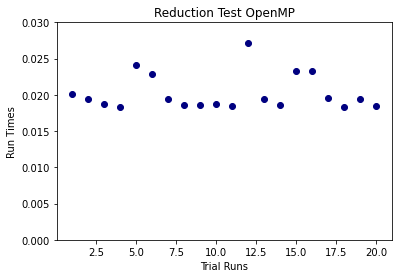

In [7]:
times = [0.0200906,  0.0194019, 0.018679, 0.018308, 0.0240659, 0.022893,\
         0.0194378, 0.0186605, 0.018628, 0.0186802, 0.0185021, 0.0271282,\
         0.0194205,   0.0185674, 0.0232926, 0.0232383, 0.0195182, 0.0183108,\
         0.0194116, 0.0185156]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "navy")
plt.title("Reduction Test OpenMP")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.030)
time_mean = np.mean(times)
print("The average run time of the OpenMP reduction program method is {}".format(time_mean))

The reason this method did not improve the run time is because the way this code is written does not include a combiner/operator such as $+=$ $*=$ ^$=$. Each calculation is made and stored into another variable. Therefore, reduction would not be a useful OpenMP option for this instance. This explains why the reduction run-time did not have a faster run-time than the serial program. It was not used properly in this circumstance. Reduction makes a local copy of variables in a list and is accessed when the operator put in the first parameter is called. 

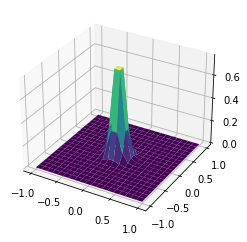

In [14]:
from mpl_toolkits import mplot3d

u = np.loadtxt('u_sol_000000.txt')
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
yl = len(y)

x = np.tile(x, (len(x), 1))
tmp = []
for i in range(yl):
    tmp.append([y[i]] * yl)
y = np.array(tmp)

ax = plt.axes(projection='3d')
ax.plot_surface(x, y, u, rstride = 1, cstride = 1, cmap='viridis')

*Description: This image is the iteration which is being tested. It is not a gif because I am only testing this instance of the wave project, not later time iterations*

--------------------------------------------------------------------------------------

### MPI

The MPI application of the wave equation is formatted differently and the associated files connected to the program can be found in the repository named MPI_1D. The send and receive process is enables by *MPI_Comm_rank(MPI_COMM_WORLD, &rank);* and  *MPI_Comm_size(MPI_COMM_WORLD, &size);*. The purpose of the rank in this program is to ensure that the calculation ranges of $x$ and $y$ stay within bounds of the $(rank+1)*(\frac{M}{size})$

I added the following code to main.cpp in the main function in order to run a serial time test on the program

`int main(int argc, char** argv)`

*beginning of function*

`auto begin = std::chrono::high_resolution_clock::now();`

.

.

.

*end of function*

`auto end = std::chrono::high_resolution_clock::now();
auto elapsed = std::chrono::duration_cast<std::chrono::nanoseconds(end-
begin);
 cout << "Time to compute [s]: " << elapsed.count()*1e-9 << endl;`
 
 
 `MPI_Finalize();
 return 0;`

--------------------------------------------------

#### Running in Serial MPI

The first test for MPI is to run a ***serial test*** on the `main.cpp` file within MPI_1D repository. The average run time 

of this test is stated below as well as a scatter plot to represent the tests over the 20 time trials ran. It is important to ***note: the time it takes to run this program is significantly longer than OpenMP program, the Y-axis is adjusted from range 0.03 to 0.200 seconds***

The average run time of the serial program is 0.14478785000000002


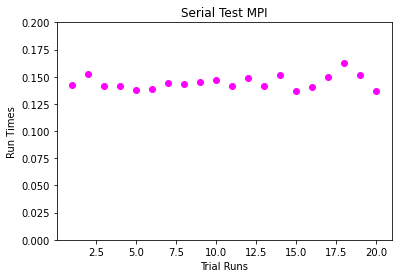

In [9]:
times = [0.142841, 0.152526,  0.141652, 0.141871,  0.137672,\
         0.138519, 0.14385, 0.143233, 0.144726, 0.147073, \
         0.141238, 0.148766, 0.141775, 0.151815, 0.136931, 0.140415, \
         0.149522,  0.162373, 0.151892, 0.137067]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "magenta")
plt.title("Serial Test MPI")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.200)
time_mean = np.mean(times)
print("The average run time of the serial program is {}".format(time_mean))

#### First Method: Optimize code by decreasing number of loops

This is a basic method of cleaning the data that does not directly involve manipulation of MPI, but rather change in the MPI's code. I am decreasing and compounding for loops in order to decrease run-time. For parallel computing this is not an ideal algorithm because every step depends on the previous value. Data dependency in this region of code makes this section a serial region. The algorithm is allowed to have this data dependency because it is not in a parallel region. The MPI_Barrier separate the parallel region from the serial region.

   **I decreased the following loops from this:**                                    

        for (int i = istart; i <= iend ; i++){                      
            Lap(i) = h2i*(-2*u(i)+u(i-1)+u(i+1));                        
                                                                         
        }                                                                
            // Update time levels     `                                  
        for (int i = istart; i <= iend ; i++){
           up(i) = 2.0*u(i)-um(i) + dt2*Lap(i);
           um(i) = u(i);
           u(i) = up(i);
        } 
        
        
   **to this:**
   
        for (int i = istart; i <= iend ; i++){
        
            Lap(i) = h2i*(-2*u(i)+u(i-1)+u(i+1));
            up(i) = 2.0*u(i)-um(i) + dt2*Lap(i);
            um(i) = u(i);
            u(i) = up(i);

The average run time of the efficient algorithm program is 0.1362792


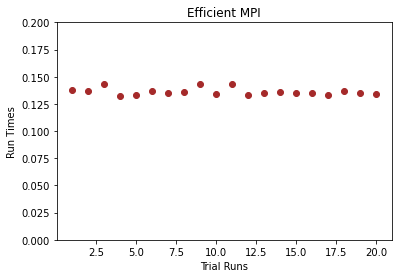

In [10]:
times = [0.138007, 0.136683,  0.143576, 0.132608,  0.133454,\
         0.136685, 0.135035, 0.135867, 0.142945, 0.133665, \
         0.143615, 0.133352, 0.134633, 0.136204, 0.135404, 0.135023, \
         0.133337,  0.136604, 0.134649, 0.134238]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "brown")
plt.title("Efficient MPI")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.200)
time_mean = np.mean(times)
print("The average run time of the efficient algorithm program is {}".format(time_mean))

#### Second Method: Non-blocking Communication technique

This method gets rid of the time it takes for process 0 to be waiting for process 1. This process gets rid of this waiting time by continuing the calculation without waiting for the send or receive to finish and check every so often that communication has completed. Messages are sent to a buffer so the application does not have to wait for the receive to be ready for the sent message. 

   **I replaced the following code from this:**
    
    
        usl = u(istart);
    
        MPI_Sendrecv(&usl,1,MPI_DOUBLE,to_my_left,0,
                     &urr,1,MPI_DOUBLE,to_my_right,MPI_ANY_TAG,MPI_COMM_WORLD,&status);
                     
        u(iend+1) = urr;
        usr = u(iend);       
        
        MPI_Sendrecv(&usr,1,MPI_DOUBLE,to_my_right,1,
                     &url,1,MPI_DOUBLE,to_my_left,MPI_ANY_TAG,MPI_COMM_WORLD,&status);
        u(istart-1) = url;
        
       
        MPI_Barrier(MPI_COMM_WORLD);
    
    
    
   **to this:**
    
    
    
        usl = u(istart);
        
        
        MPI_Isend(&usl,1,MPI_DOUBLE,to_my_left,0,MPI_COMM_WORLD,&reqs[2]);
        MPI_Irecv(&urr,1,MPI_DOUBLE,to_my_right,MPI_ANY_TAG,MPI_COMM_WORLD,&reqs[1]);
        
        u(iend+1) = urr;
        usr = u(iend);
        
        
        MPI_Isend(&usr,1,MPI_DOUBLE,to_my_right,1,MPI_COMM_WORLD,&reqs[3]);
        MPI_Irecv(&url,1,MPI_DOUBLE,to_my_left,MPI_ANY_TAG,MPI_COMM_WORLD,&reqs[0]);
        
        
        u(istart-1) = url;
        
        MPI_Waitall(4, reqs, status); 
        
        
        
     

The average run time of the non-blocking communication algorithm program is 0.1357773


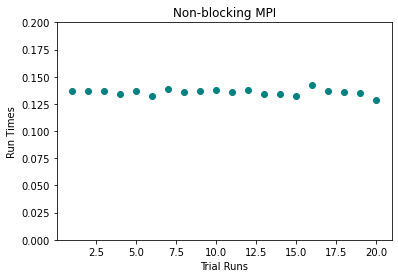

In [11]:
times = [0.136697, 0.137109,  0.136884, 0.134336,  0.13645,\
         0.132522, 0.138397, 0.135978, 0.137059, 0.137643, \
         0.136178, 0.137396, 0.134557, 0.134447, 0.131916, 0.142153, \
         0.136532,  0.135521, 0.134743, 0.129029]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "teal")
plt.title("Non-blocking MPI")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.200)
time_mean = np.mean(times)
print("The average run time of the non-blocking communication algorithm program is {}".format(round(time_mean,7)))

#### Third Method: Balancing Workload technique

MPI_BARRIER classifies as a blocking technique. Different parts of the wave equation allocate different amounts of data and processing time to calculate all variables of the equation. It takes more time to calculate the arrays holding the wave height calculations rather than the communication. This is what creates a workload imbalance. Having MPI_BARRIER further worsens the work imbalance by separating the communication with the calculation code. The communication needs to finish before moving onto the next calculation. Getting rid of the barrier can decrease the workload imbalance issue. 

The average run time of the workload balance algorithm program is 0.1347895


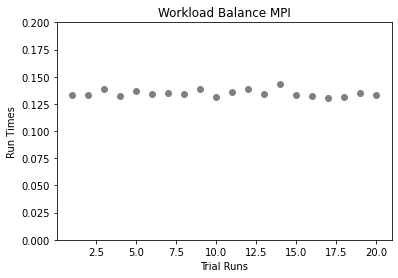

In [12]:
times = [0.133079, 0.133071,  0.138724, 0.132685,  0.136891,\
         0.134396, 0.13532, 0.134332, 0.138534, 0.130918, \
         0.135892, 0.138672, 0.134115, 0.143706, 0.133431, 0.132587, \
         0.130006,  0.131251, 0.134989, 0.133191]

trials = np.arange(1,21)

plt.scatter(trials, times, c = "grey")
plt.title("Workload Balance MPI")
plt.xlabel("Trial Runs")
plt.ylabel("Run Times")
plt.ylim(0, 0.200)
time_mean = np.mean(times)
print("The average run time of the workload balance algorithm program is {}".format(round(time_mean,7)))

---------------------------------------------------

# Conclusion

------------------------------------------------------------------

Overall, the comparison of OpenMP and MPI methods were crucial in understanding how these parallel programming standards function on shared memory systems and distributed memory systems. OpenMP took shorter to run because on shared memory systems, the instructions and data are stored as a copy and shared among all processors. Any processor can access this information, therefore processors can quickly access memory. The wave equation has many steps to calculate points due to time step incrementation and Laplacian calculations, requiring data to be stored in many different locations. For OpenMP, data sharing between tasks is significantly faster since copies of data are saved locally for use. This explains why it takes less time for the serial OpenMP program to run compared to the serial MPI wave equation. In the MPI application, the data's memory for the height value (also known as the double type value **u**) is designated what processors to allocate to and when to receive said memory. 

The OpenMP clause collapse() proved to be effective when placed around double for loops because the loop sharing construct simultaneously pulls values into a local copy for later iterations. The next thread iteration pulls from the local shared copy. The collapsed parallelization of the for loops did not decrease the run-time significantly. There was improvement in the run-time slightly due to the nested loops being collapsed into one bigger loop in sequential order. The issue with using collapse() in this way is that the iterations variables have interdependencies. The number specified in collapse( ) has to match the number of for loops.  When testing the schedule clause, static and dynamic were tested, as well as what happens if the chunk size/iteration size was increased. Dynamic scheduling proved to be superior because of the complex workload of storing data in different arrays after calculations. The reason `(dynamic,4)` did better time wise than the default (which would be 1 instead of 4) is because increasing the chunk size balances the workload across multiple threads. The reduction clause does not work in this instance because there is no operator used in this instance. The wave project focuses on the storing of data and how that data is shared across multiple threads. 

For the MPI application, the main test was to see the difference between blocking and non-blocking communication. A blocking communication example can be seen via the serial test of the wave project MPI application. The difference between blocking and non-blocking communication is if the iteration task has to pause and wait for the messages to be sent and received or if those events can happen simultaneously. The non-blocking method proved to be quicker than the blocking method when ensuring portions of the calculation were completed using MPI_Wait() to check the status of the operations and return values when all requests are complete. The computation/communication concurrency decreases the time it takes to run. The program sets the beginning and end **u** values with respect to the rank of the iteration. This **u** value is used in the serial part of the bode. It is hard to balance the workload any further. Getting rid of the barrier can cause synchronization issues, two or more threads access the same location in memory, **u**. For this application the most optimial test ran was the non-blocking method. 

For the goals of this project were achieved. The time trials proved that the best strategy for speeding up efficiency was using dynamic scheduling and separating tasks into chucks of 4. Since there are many sets of values to iterate through, the separation of tasks among threads concurrently pulls values to be used in the computation. The main issue I face was using clauses that did not rely on variables that have data dependency. This experimentation taught how to create a shared memory system using complex equations. For distributed memory systems, the experiment that the process for implementing these functions is to establish what tasks need to be paused for the message to be sent and received, and what tasks do not. The iterations that store data in different locations within the serial portion of code are tasks that cannot be used in a parallel region. Blocking programs are efficient because a message sends even if the program is not ready to receive the message. The main difference after is that non-blocking requires a status check that reports the transfers of data. The non-blocking method also waits before moving onto the Laplacian calculation. Non-blocking proved to be more efficient because request objects are stored in a data buffer and used in the calculation at the specified status time. 


-------------------------------------------------

## Resources

----------------------------

[1]   J. Layton, “Introduction to openmp " admin magazine,” ADMIN Magazine. [Online]. Available: https://www.admin-magazine.com/HPC/Articles/Parallel-Programming-with-OpenMP#:~:text=The%20goal%20is%20to%20keep,is%20exactly%20what%20OpenMP%20does. [Accessed: 30-Apr-2023]. 


[2]   “Cornell Virtual Workshop: Clauses,” cvw.cac.cornell.edu. https://cvw.cac.cornell.edu/openmp/clauses#red (accessed Apr. 30, 2023).


[3]    “Cornell Virtual Workshop: Blocking and non-Blocking,” cvw.cac.cornell.edu. https://cvw.cac.cornell.edu/parallel/block


[4]    “Cornell Virtual Workshop: Overview,” cvw.cac.cornell.edu. https://cvw.cac.cornell.edu/openmp/default (accessed Apr. 30, 2023).


[5]    “Private, firstprivate and lastprivate clauses · OpenMP Little Book,” nanxiao.gitbooks.io. https://nanxiao.gitbooks.io/openmp-little-book/content/posts/private-firstprivate-and-lastprivate-clauses.html (accessed Apr. 30, 2023).


[6]     “Open Multi-Processing (OpenMP) :: High Performance Computing,” hpc.nmsu.edu. https://hpc.nmsu.edu/discovery/mpi/mpi-openmp/ (accessed Apr. 30, 2023).


[7]     “chryswoods.com | Part 1: omp simd features,” chryswoods.com. https://chryswoods.com/vector_c++/features.html (accessed Apr. 30, 2023).


[8]     “What is message passing interface (MPI)? - Definition from WhatIs.com,” SearchEnterpriseDesktop. https://www.techtarget.com/searchenterprisedesktop/definition/message-passing-interface-MPI


[9]     “Chapter 3: schedule,” ppc.cs.aalto.fi. https://ppc.cs.aalto.fi/ch3/schedule/


[10]     “mplot3d tutorial — Matplotlib 2.0.0 documentation,” w.9lo.lublin.pl. http://w.9lo.lublin.pl/DOC/python-matplotlib-doc/html/mpl_toolkits/mplot3d/tutorial.html (accessed Apr. 30, 2023).


[11]      “Blocking and non-blocking MPI communications MPI.” Accessed: Apr. 30, 2023. [Online]. Available: https://web.njit.edu/~shahriar/class_home/HPC/mpi3.pdf


[12]      “MPI Programming -Part 1.” Accessed: Apr. 30, 2023. [Online]. Available: https://www.cs.usask.ca/~spiteri/CMPT851/notes/MPIprogramming.pdf


[13]“NON-BLOCKING COMMUNICATION.” Accessed: Apr. 30, 2023. [Online]. Available: https://www.csc.fi/documents/200270/224572/advanced_MPI.pdf/3a49a631-d403-4bbf-85ba-a8daf17f17d2
